In [1]:
import urllib.request
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import datetime
%matplotlib inline

In [27]:
urllib.request.urlretrieve("http://remote.byu.io:3000/restaurant", './log.txt')

('./log.txt', <http.client.HTTPMessage at 0x121e01780>)

In [28]:
df = pd.read_csv('./log.txt', header=None, names=['time', 'numPeople'])

In [29]:
df.head()

,time,numPeople
0,1.509632e+09,0
1,1.509632e+09,1
2,1.509632e+09,2
3,1.509632e+09,1
4,1.509632e+09,1


In [30]:
df.size

56252

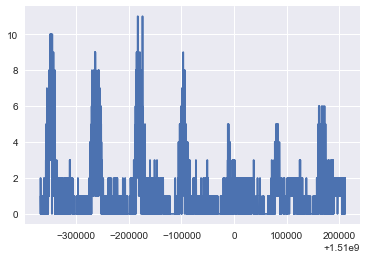

In [31]:
plt.plot(df['time'], df['numPeople'])

In [19]:
datetime.datetime.fromtimestamp(
        list(df.tail()['time'])[0]
    ).strftime('%Y-%m-%d %H:%M:%S')

'2017-11-09 02:04:23'

In [20]:
list(df.tail()['time'])[0]

1510211063.3986413

In [21]:
numMin = {}
totMin = {}
urllib.request.urlretrieve("http://remote.byu.io:3000/restaurant", './log.txt')
f = open("./log.txt")

windowStart = 0
windowLen = 5
windowCount = 0
windowTotal = 0
windowMax = 0
windowMin = 1000

dateNum = {}
dateMax = {}
dateAvg = {}
dateTot = {}

timeMaxTot = {}
timeNums = {}

for line in f:
    date, num = line.strip().split(',')
    num = int(num)
    minute = float(date) // 60
    if windowStart == 0 or minute > windowStart + windowLen - 1:
        if windowStart != 0:
            if time not in timeMaxTot:
                timeMaxTot[time] = dateMax[winDate]
                timeNums[time] = 1
            else:
                timeMaxTot[time] += dateMax[winDate]
                timeNums[time] += 1
            
        windowStart = minute
        #print(minute)
        winDate = datetime.datetime.utcfromtimestamp(float(date))
        time = winDate.strftime('%H:%M')
        
    
    #print(time, num)
    if time not in numMin:
        numMin[time] = num
    else:
        numMin[time] += num
    if time not in totMin:
        totMin[time] = 1
    else:
        totMin[time] += 1
    
    if winDate not in dateNum:
        dateNum[winDate] = 1
        dateTot[winDate] = num
        dateMax[winDate] = num
        dateAvg[winDate] = num
    else:
        dateNum[winDate] += 1
        dateTot[winDate] += num
        dateMax[winDate] = max(num, dateMax[winDate])
        dateAvg[winDate] = dateTot[winDate]/dateNum[winDate]
minute = []
avg = []
for time in numMin:
    #avgMin[time] = numMin[time]/totMin[time]
    #minute.append(time)
    minute.append(datetime.datetime.strptime(time, '%H:%M'))
    avg.append((numMin[time]/totMin[time]))

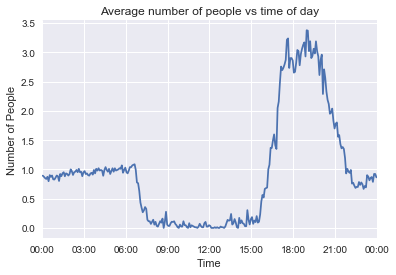

In [22]:
from pytz import timezone
import pytz
rotterdam = timezone('Europe/Berlin')
s = minute.index(min(minute))#minute.index(datetime.datetime(1900,1,1,0,0))
sortMin = minute[s:] + minute[:s]
sortAvg = avg[s:] + avg[:s]
dates = matplotlib.dates.date2num(sortMin)
plt.plot_date(dates, sortAvg, fmt="-")
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title("Average number of people vs time of day")
plt.gca().set_xlim([datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 2, 0, 0)])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

(array([ 736636.,  736637.,  736638.,  736639.,  736640.,  736641.,  736642.]),
 <a list of 7 Text xticklabel objects>)

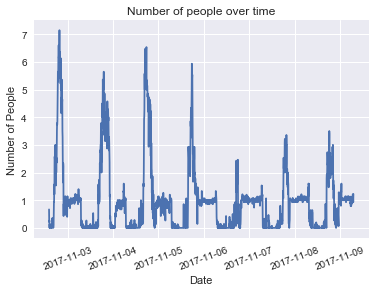

In [35]:
mins = [i for i in dateAvg]
avgs = [dateAvg[i] for i in dateAvg]
dates = matplotlib.dates.date2num(mins)
plt.plot_date(dates, avgs, fmt="-")
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title("Number of people over time")
plt.xticks(rotation=20)

(array([ 736636.,  736637.,  736638.,  736639.,  736640.,  736641.,  736642.]),
 <a list of 7 Text xticklabel objects>)

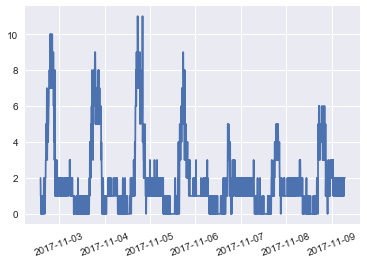

In [36]:
mins = [i for i in dateAvg]
avgs = [dateMax[i] for i in dateAvg]
dates = matplotlib.dates.date2num(mins)
plt.plot_date(dates, avgs, fmt="-")
plt.xticks(rotation=20)

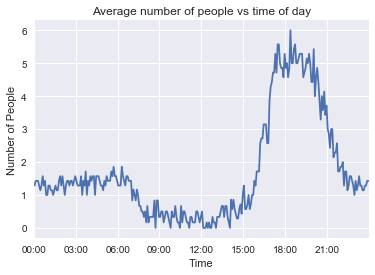

In [25]:
minute = []
avg = []

for time in timeMaxTot:
    #avgMin[time] = numMin[time]/totMin[time]
    #minute.append(time)
    minute.append(datetime.datetime.strptime(time, '%H:%M'))
    avg.append((timeMaxTot[time]/timeNums[time]))
    
s = minute.index(min(minute))#minute.index(datetime.datetime(1900,1,1,0,0))
sortMin = minute[s:] + minute[:s]
sortAvg = avg[s:] + avg[:s]
dates = matplotlib.dates.date2num(sortMin)
plt.plot_date(dates, sortAvg, fmt="-")
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title("Average number of people vs time of day")
plt.gca().set_xlim([datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 23, 59)])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

In [26]:
minute[0].astimezone(pytz.timezone("America/New_York"))

datetime.datetime(1900, 1, 1, 14, 12, tzinfo=<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>)

In [15]:
minute[0]

datetime.datetime(1900, 1, 1, 14, 8)